# Logistic Regression with Variations of Polynomial, Penalty, Dual and C values

In [2]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the dataset
df= pd.read_csv(r"C:\Users\User\Downloads\data.csv",delimiter=',',na_values='?')
# If Overall for a play is less than 72, the player will be classify as bad player.
# Otherwise, the player will be classify as good player.
df.loc[df.Overall<72,'Y']=0
df.loc[df.Overall>=72,'Y']=1

In [5]:
# Set the data (X) and target (Y) values
Y=np.array(df['Y'])
X = df.drop(columns=['Overall','Y'])

# Print the shape of data (X) and target (Y) values
print(X.shape)
print(Y.shape)

(8761, 42)
(8761,)


# Data Pre-Processing
Scale before splitting the data into train and test- scale the data since we will be using gradient ascent

In [4]:
# Use preprocessing to scale the data and use train_test_split to split the data.
x_scale = preprocessing.scale(X)
y = Y

x_train, x_test, y_train, y_test = train_test_split(x_scale, y)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


# Fitting Model using Sk Learn Library. 

In [5]:
accuracy_values_train = []
accuracy_values_test = []
variations = []
boolDual = True
cVal = [0.01, 0.1, 1]
for i in range(2):
    # Create an object of PolynomialFeatures(i+1)
    poly = PolynomialFeatures(degree=(i+1))
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.fit_transform(x_test)
    for j in range (2):
        # Set penalty and dual
        penaltyType ='l'+str(j+1)
        boolDual = not boolDual
        # set c value
        for c in cVal:
            # Create object of logistic regression model. Past value of C, dual, and penalty  for different variation
            logreg = LogisticRegression(C=c,dual=boolDual,penalty=penaltyType)
            # Fit the model with train data
            logreg.fit(x_train_poly, y_train)
            # Predicted values on training set using logreg.predict
            yhat_train = logreg.predict(x_train_poly)
            # The accuracy achieved on training set using logreg.score
            acc_train = logreg.score(x_train_poly, y_train)
            accuracy_values_train.append(acc_train)
        
            # Predicted values on testing set using logreg.predict
            yhat_test = logreg.predict(x_test_poly)
            # The accuracy achieved on testing set using logreg.score
            acc_test = logreg.score(x_test_poly, y_test)
            accuracy_values_test.append(acc_test)
        
            variation = "C=" + str(c) +" & Dual=" +str(boolDual)+ " & Penalty=" + penaltyType + " & Degree= " + str(i+1)
            variations.append(variation)
            print(variation)
            print(acc_train)
            print(acc_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.01 & Dual=False & Penalty=l1 & Degree= 1
0.9184170471841705
0.9128251939753537
C=0.1 & Dual=False & Penalty=l1 & Degree= 1
0.9659056316590563
0.9666818804198996
C=1 & Dual=False & Penalty=l1 & Degree= 1
0.9719939117199391
0.9680511182108626
C=0.01 & Dual=True & Penalty=l2 & Degree= 1
0.9191780821917809
0.9105431309904153
C=0.1 & Dual=True & Penalty=l2 & Degree= 1
0.943683409436834
0.9415791875855773


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


C=1 & Dual=True & Penalty=l2 & Degree= 1
0.9628614916286149
0.9612049292560475


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.01 & Dual=False & Penalty=l1 & Degree= 2
0.9343987823439879
0.9274303970789594


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.1 & Dual=False & Penalty=l1 & Degree= 2
0.9774733637747336
0.970333181195801


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=1 & Dual=False & Penalty=l1 & Degree= 2
0.9940639269406393
0.9680511182108626


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.01 & Dual=True & Penalty=l2 & Degree= 2
0.9648401826484019
0.9470561387494295


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.1 & Dual=True & Penalty=l2 & Degree= 2
0.9864535768645357
0.9589228662711091
C=1 & Dual=True & Penalty=l2 & Degree= 2
0.9931506849315068
0.9552715654952076


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Plotting Accuracy v/s Variations.

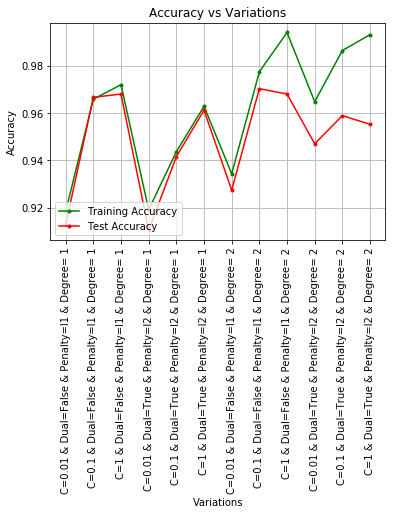

In [6]:
# Plot Accuracy v/s Variations.
plt.plot(variations,accuracy_values_train,'.-',color='green')
plt.plot(variations,accuracy_values_test,'.-',color='red')
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower left')
plt.xlabel('Variations')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.title("Accuracy vs Variations")
plt.grid()

In [7]:
# Based on the graph, variation where C=1, dual=False, penalty = l1 and degree = 2 give the highest accuracy
# Print out all the coefficients for that variation
logreg = LogisticRegression(C=1,dual=False,penalty="l1")
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
logreg.fit(x_train_poly, y_train)
yhat = logreg.predict(x_train_poly)
w = logreg.coef_
intercept = logreg.intercept_

print(w)
print(intercept)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 0.00000000e+00  3.59426872e+00  5.57992330e+00  1.85336315e+01
   2.14506964e-01  3.70046976e-01  3.02150854e-02  7.96581222e-02
   7.64019715e-01  6.72210982e-01  6.05878386e-01  1.86391424e+00
   4.37099681e-01  5.77377205e-01  0.00000000e+00  1.70026257e-01
   6.29403812e-02  1.43592582e+00  1.25077769e-02  6.36981143e-01
   3.34567519e-01  0.00000000e+00 -8.98690624e-02  4.65392105e-01
   3.25741173e-01  2.42143039e-01  4.40740525e-01  0.00000000e+00
   3.44757483e-01  6.33633476e-01  1.08119058e+00  9.81120185e-01
   3.39289379e-01  2.41191627e-01  1.37703025e+00  6.14835871e-01
   1.19117524e+00  2.58715081e-03  1.05314255e+00  0.00000000e+00
   6.72683893e-01  3.85471681e-02  1.76264992e+00 -2.55717306e-01
   2.78747854e+00 -3.08784518e+00  0.00000000e+00 -4.40489402e-01
  -2.33931145e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -4.93501754e-04 -1.01986223e-01  5.09005253e-01
   0.00000000e+00  1.18137871e-01  0.00000000e+00 -2.64279556e-01
   7.96790

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Performance Metrics:


In [8]:
# Based on the graph, variation where C=1, dual=False, penalty = l1 and degree = 2 give the highest accuracy
# Print out precision, recall and fscore using precision_recall_fscore_support nethod of sklearn for that variation
prec , recal , fscore,_ = precision_recall_fscore_support(y_train, yhat)

print (prec)
print (recal)
print (fscore)

[0.99258649 0.99487705]
[0.99586777 0.99081633]
[0.99422442 0.99284254]
